In [107]:
import numpy as np
import matplotlib.pyplot as plt

In [108]:
np.random.seed(42)
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

In [109]:
def add_polynomial_features(X, degree=2):
    X_poly = X.copy()
    for power in range(2, degree + 1):
        X_poly = np.hstack((X_poly, X ** power))
    return X_poly

In [110]:
def standardize(X, mean=None, std=None):
    if mean is None:
        mean = np.mean(X, axis=0)
    if std is None:
        std = np.std(X, axis=0)
    return (X - mean) / std, mean, std

In [111]:
class RidgeRegression:
    def __init__(self, learning_rate=0.01, epochs=1000, lambda_=0.1):
        self.lr = learning_rate
        self.epochs = epochs
        self.lambda_ = lambda_

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.theta = np.zeros((n_features, 1))
        for _ in range(self.epochs):
            y_pred = X.dot(self.theta)
            error = y_pred - y
            gradients = (1 / n_samples) * X.T.dot(error) + (self.lambda_ / n_samples) * self.theta
            self.theta -= self.lr * gradients

    def predict(self, X):
        return X.dot(self.theta)

In [112]:
class LassoRegression:
    def __init__(self, learning_rate=0.01, epochs=1000, lambda_=0.1):
        self.lr = learning_rate
        self.epochs = epochs
        self.lambda_ = lambda_

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.theta = np.zeros((n_features, 1))
        for _ in range(self.epochs):
            y_pred = X.dot(self.theta)
            error = y_pred - y
            gradients = (1 / n_samples) * X.T.dot(error) + (self.lambda_ / n_samples) * np.sign(self.theta)
            self.theta -= self.lr * gradients

    def predict(self, X):
        return X.dot(self.theta)

In [113]:
degree = 5

# Prepare features
X_poly = add_polynomial_features(X, degree=degree)
X_poly, mean, std = standardize(X_poly)
X_sorted = np.sort(X, axis=0)
X_sorted_poly = add_polynomial_features(X_sorted, degree=degree)
X_sorted_poly, _, _ = standardize(X_sorted_poly, mean, std)

In [114]:
# Train models
ridge = RidgeRegression(learning_rate=0.1, epochs=1000, lambda_=0.001)
ridge.fit(X_poly, y)
ridge_pred = ridge.predict(X_sorted_poly)

lasso = LassoRegression(learning_rate=0.1, epochs=1000, lambda_=0.001)
lasso.fit(X_poly, y)
lasso_pred = lasso.predict(X_sorted_poly)

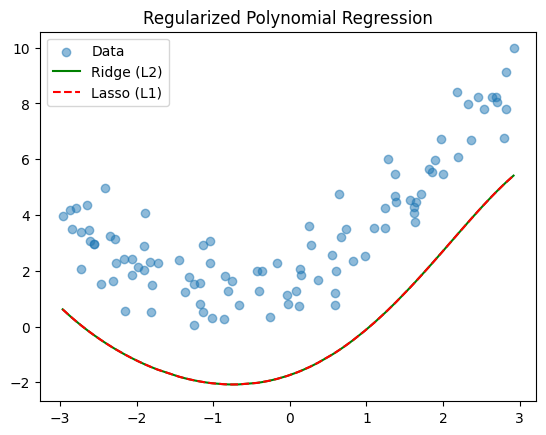

In [115]:
# Plotting function
def plot_results(X, y, X_sorted, ridge_pred, lasso_pred):
    plt.scatter(X, y, alpha=0.5, label="Data")
    plt.plot(X_sorted, ridge_pred, color='green', label='Ridge (L2)')
    plt.plot(X_sorted, lasso_pred, color='red', linestyle='--', label='Lasso (L1)')
    plt.title("Regularized Polynomial Regression")
    plt.legend()
    plt.show()

plot_results(X, y, X_sorted, ridge_pred, lasso_pred)


In [116]:
# MSE
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)
mse_ridge = mean_squared_error(y, ridge.predict(X_poly))
mse_lasso = mean_squared_error(y, lasso.predict(X_poly))
print(f"Ridge MSE: {mse_ridge:.4f}")
print(f"Lasso MSE: {mse_lasso:.4f}")


Ridge MSE: 12.4106
Lasso MSE: 12.4106


In [117]:
# hyperparameter tuning: find the best learning rate, degree and lambda for Ridge Regression and Lasso Regression
def hyperparameter_tuning(X, y, degrees, lambdas, learning_rates):
    best_mse_ridge = float('inf')
    best_params_ridge = None
    best_mse_lasso = float('inf')
    best_params_lasso = None

    for degree in degrees:
        X_poly = add_polynomial_features(X, degree=degree)
        X_poly, mean, std = standardize(X_poly)

        for lambda_ in lambdas:
            for lr in learning_rates:
                ridge = RidgeRegression(learning_rate=lr, epochs=1000, lambda_=lambda_)
                ridge.fit(X_poly, y)
                mse_ridge = mean_squared_error(y, ridge.predict(X_poly))

                if mse_ridge < best_mse_ridge:
                    best_mse_ridge = mse_ridge
                    best_params_ridge = (degree, lambda_, lr)

                lasso = LassoRegression(learning_rate=lr, epochs=1000, lambda_=lambda_)
                lasso.fit(X_poly, y)
                mse_lasso = mean_squared_error(y, lasso.predict(X_poly))

                if mse_lasso < best_mse_lasso:
                    best_mse_lasso = mse_lasso
                    best_params_lasso = (degree, lambda_, lr)

    return (best_mse_ridge, best_params_ridge), (best_mse_lasso, best_params_lasso)

# Hyperparameter tuning
degrees = [2, 3, 4, 5]
lambdas = [0.001, 0.01, 0.1, 1]
learning_rates = [0.001, 0.01, 0.1]
best_ridge, best_lasso = hyperparameter_tuning(X, y, degrees, lambdas, learning_rates)
print(f"Best Ridge MSE: {best_ridge[0]:.4f}, Parameters: Degree={best_ridge[1][0]}, Lambda={best_ridge[1][1]}, Learning Rate={best_ridge[1][2]}")
print(f"Best Lasso MSE: {best_lasso[0]:.4f}, Parameters: Degree={best_lasso[1][0]}, Lambda={best_lasso[1][1]}, Learning Rate={best_lasso[1][2]}")


Best Ridge MSE: 12.4106, Parameters: Degree=5, Lambda=0.001, Learning Rate=0.1
Best Lasso MSE: 12.4106, Parameters: Degree=5, Lambda=0.001, Learning Rate=0.1
